<a href="https://colab.research.google.com/github/PROG-T/pytorch-workflow/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working with data




In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


In [2]:
#Download training data from open datasets
training_data = datasets.FashionMNIST(root="data",
                                      train =True,
                                      download=True,
                                      transform=ToTensor())
#Download test data from open datasets
test_data = datasets.FashionMNIST(root="data",
                                  train= False,
                                  download=True,
                                  transform=ToTensor())

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 189kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.41MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.4MB/s]


In [3]:
batch_size = 64
#create data loaders by passing dataset and batchsize
train_dataloader = DataLoader(training_data,batch_size)
test_dataloader = DataLoader(test_data, batch_size)

for x,y in test_dataloader:
  print(f"shape of x [N,C,H,W]: {x.shape}")
  print(f"shape of y: {y.shape} {y.dtype}")

shape of x [N,C,H,W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64
shape of x [N,C,H,W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64
shape of x [N,C,H,W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64
shape of x [N,C,H,W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64
shape of x [N,C,H,W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64
shape of x [N,C,H,W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64
shape of x [N,C,H,W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64
shape of x [N,C,H,W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64
shape of x [N,C,H,W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64
shape of x [N,C,H,W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64
shape of x [N,C,H,W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64

Creating models

In [4]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

print(f"using {device} device")

#Define model
class NeuralNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_Stack = nn.Sequential(nn.Linear(28*28,512),
                                           nn.ReLU(),
                                           nn.Linear(512, 512),
                                           nn.ReLU(),
                                           nn.Linear(512,10)
                                           )
    def forward(self,x):
      x = self.flatten(x)
      logits = self.linear_relu_Stack(x)
      return logits

model = NeuralNetwork().to(device)
print (model)

using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_Stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


# New Section

In [5]:
#Things to cover
#1.data preparation and loading
#2.build model
#3.fitting the model to data(training)
#4.making predictions and evaluating the model(inference)
#5.saving and loading a model
#6.putting it all together

In [6]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.9.0+cu128'

In [7]:
#data preparing and loading
#we'll use a linear regression formula to make a straight line with known parameters

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10], len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [8]:
#splitting data into training and testing sets
#create a train/test data split

train_split = int(0.8 * len(X)) #0.8 is 80% of the total length of data(50)

X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

X_train, y_train, X_test, y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [9]:
#write a function to visualize the data

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  """
  plots training data, test data and compares predictions
  """
  plt.figure(figsize = (10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

  #Are there any predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")

  plt.legend(prop = {"size": 14})


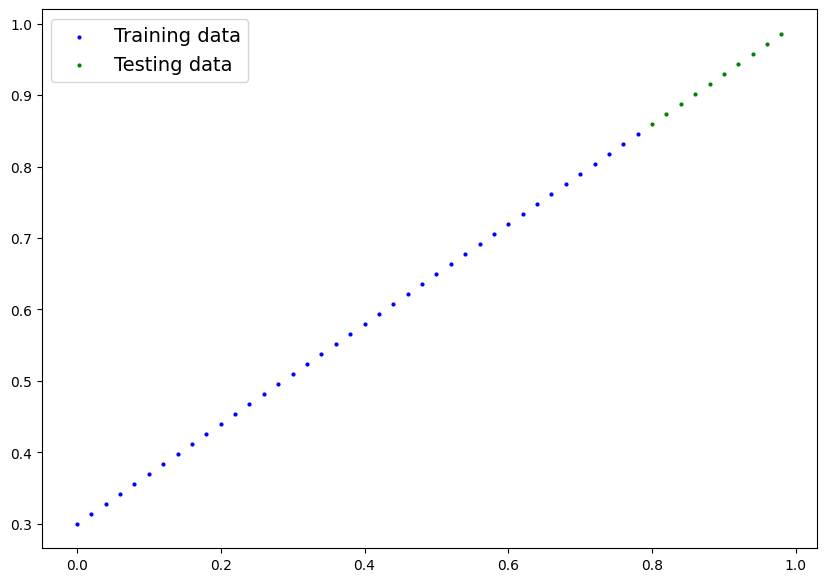

In [10]:
#call plot_predictions method
plot_predictions()

What does our model do?

1.It starts with random values (for weight & bias)
2.look at the training data and adjust the random values to better represent the ideal values used to create the training data.

It does this through two main algorithms:
1.Gradient descent
2.Backpropagation

In [11]:
#building a first pytorch model
#create Linear regression model class
#difference between torch.rand and torch.randn- torch.rand creates uniform
#distributed values while randn creates normally distributed values

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float32))
    #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [12]:
#checking the content of our pytorch model, by content here, I mean parameters
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
#to get the list of all parameters of the models
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

making predictions using torch.inference_mode()
To check the model's predictive power, lets seehow well it predicts y_test based on x_test. When we pass the x_text data through our model, it would run it through its forward method.

In [14]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [15]:
#making predictions with model
with torch.inference_mode():
  y_preds =model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Y_preds is shockingly different from the expected outcome which is y_test

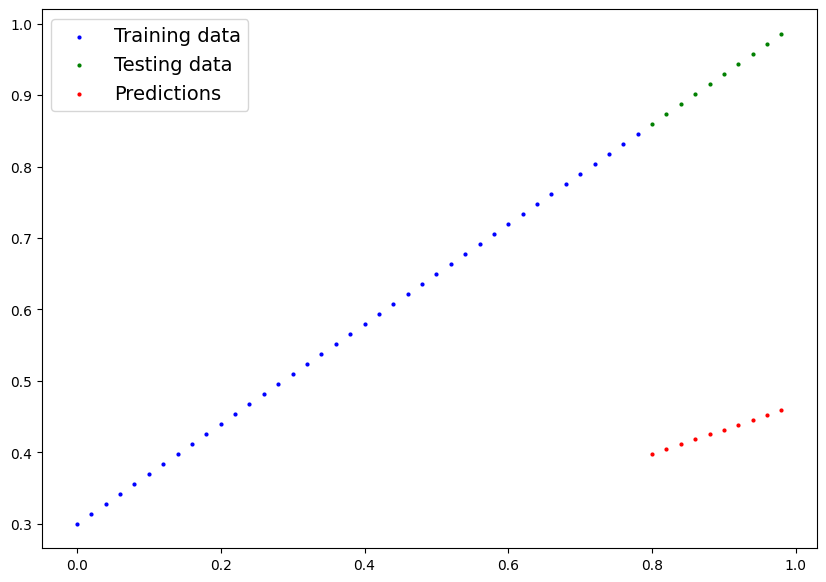

In [16]:
#visualize the predictions using plot_predictions function

plot_predictions(predictions = y_preds)

#Training model
The whole idea of training a model is to move from some unknown parameters(could be random) to known parameters. One way to measure how poor or wrong the model predictions are is to use a loss function. It is also called cost function or criterion.

#Things needed to train the model
Loss function
optimizer: takes into account the loss of a model and adjusts the model's parameter to improve the loss function. specifically for pytorch, a training loop and testing loop is needed.


In [17]:
#Pytorch has different loss functions available to measure the perediction
#error but the loss function we are going with is the nn.L1Loss() which alllows
#us get the Mean absolute error

#setup a loss function
loss_fn = nn.L1Loss()

#setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr= 0.01)
#SGD mean schotastic gradient descent. Schotastic means random
#params are the parameters you would like to optimize, some models have more
#parameters than just weight and bias
#lr means learning rate, the higher the learning rate the faster the parameters
#change

Building a training loop and(testing loop).

Some things we need in a training loop
1.Loop through the data
2.forward pass to make predictions
3.calculate the loss ()
4.optimizer zero grad
5.loss backward/backward pass move backward through the network to calculate the gradients of each parameter of our model with respect to the loss - backpropagation
6.optimizer step- use the optimizer to adjust model's parameter to try and improve the loss(gradient descent)


In [18]:
#an epoch is one loop through the data
epochs = 150

#set up empty lists to keep track of model progress
epoch_count = []
train_loss_values = []
test_loss_values = []

###Training

1.#loop through the data
for epoch in range(epochs):

  #set the model to training mode
  model_0.train() #this mode alows layers of the neural network that behave differently during evaluation and training to be taken care of

  # 3.Optimizer zero_grad() remove the gradient on parameters from this epoch
  optimizer.zero_grad()

  # 1.forward pass
  y_pred = model_0.forward(X_train)

  # 2.calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"loss: {loss}")

  # 4.perfom backpropagation on the loss of each parameter
  loss.backward()

  # 5.step the optimizer(perform gradient descent)
  optimizer.step()

  #testing loop
  model_0.eval() #turns off different settings not needed for evaluation/testing.(dropout/batch norm layers, gradient tracking)

  with torch.inference_mode(): #turn off gradient tracking and some other things needed for testing
  #with torch.no_grad() is also use similar to torch.inference_mode()
    #Do the forward pass
    test_pred = model_0.forward(X_test)

    #calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())


loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
loss: 0.3013603389263153
loss: 0.28983935713768005
loss: 0.2783183455467224
loss: 0.26679736375808716
loss: 0.2552763521671295
loss: 0.24375534057617188
loss: 0.23223432898521423
loss: 0.22071333229541779
loss: 0.20919232070446014
loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
loss: 0.18615034222602844
loss: 0.1746293306350708
loss: 0.16310831904411316
loss: 0.1515873372554779
loss: 0.14006635546684265
loss: 0.1285453587770462
loss: 0.11702437698841095
loss: 0.1060912236571312
loss: 0.09681284427642822
loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
loss: 0.08227583020925522
loss: 0.07638873159

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6638])), ('bias', tensor([0.3153]))])

In [20]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

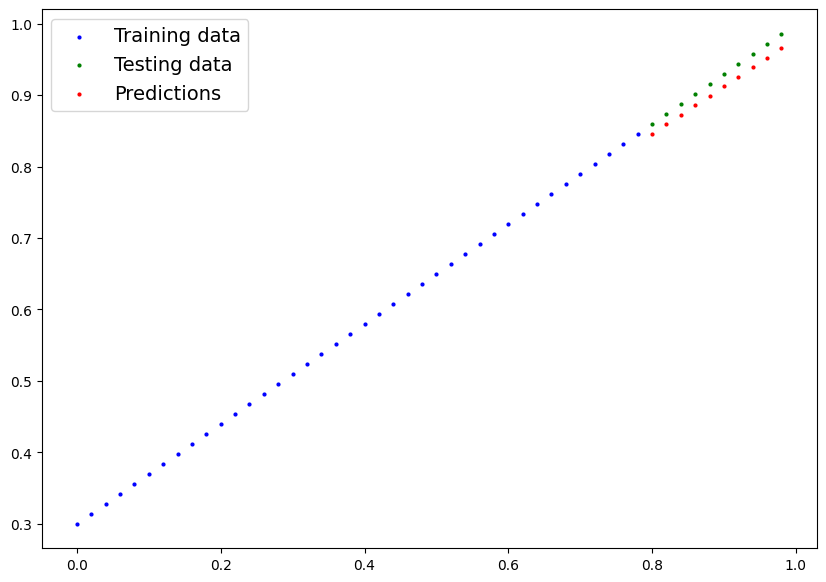

In [21]:
plot_predictions(predictions = y_preds_new)

In [22]:
model_0

LinearRegressionModel()

#saving a model in pytorch
There are three main methods to know for saving and loading models in pytorch

1. torch.save() allows model a pytorch object be saved in python's pickle format.// the recommended way is to save the state_dict
2. torch.load() allows you to load a saved Pytorch object
3. torch.nn.Module.load_state_dict() allows me load a models saved state dictionary(parameters)

In [23]:
#saving our pytorch model
from pathlib import Path

#create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# create model save path
MODEL_NAME = "01_pytorch_workflow_linearregressionmodel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save (the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_linearregressionmodel.pth


#Loading a pytorch model
since we saved our model's state_dict() rather than the entire model, we will create a new instance of our model class and load the saved state_dict into that

In [24]:
#instantiate a new instance of linear regression model class
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH ))

<All keys matched successfully>

In [25]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6638])), ('bias', tensor([0.3153]))])

In [26]:
#make some predictions with our loaded model
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model.forward(X_test)
loaded_model_preds

tensor([[0.8464],
        [0.8596],
        [0.8729],
        [0.8862],
        [0.8995],
        [0.9127],
        [0.9260],
        [0.9393],
        [0.9526],
        [0.9659]])

In [27]:
#compare loaded model preds with original preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0.forward(X_test)
y_preds

tensor([[0.8464],
        [0.8596],
        [0.8729],
        [0.8862],
        [0.8995],
        [0.9127],
        [0.9260],
        [0.9393],
        [0.9526],
        [0.9659]])

In [28]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# New Section

Putting it all together

In [29]:
#set up device agnostic code
device = "cuda" if torch.cuda.is_available() else  "cpu"

In [30]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[: 10], y[: 10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [31]:
#split data
train_Split = int(0.8  * len(X))
X_train, y_train = X[: train_Split], y[: train_Split]
X_test, y_test = X[train_split :], y[train_split :]

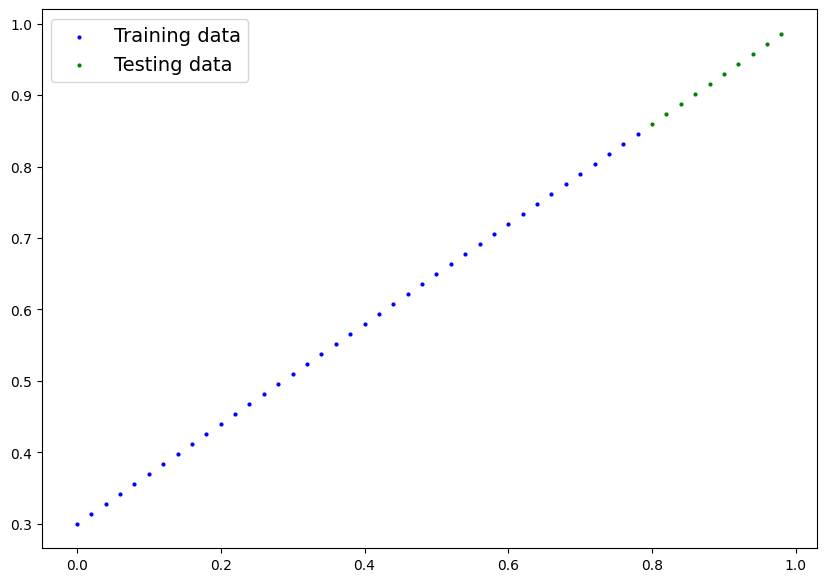

In [32]:
#plot the data

plot_predictions(X_train, y_train, X_test, y_test)

In [33]:
#building a pytorch linear model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super(). __init__()
    #use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [34]:
#check the current device model is on
next(model_1.parameters()).device

device(type='cpu')

In [35]:
#set the model to use the target device(device agnostic code for model)
model_1.to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [36]:
# setup loss function and optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)


In [37]:
#training model_1

torch.manual_seed(42)

epochs = 200

#put data on the target device(device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)



for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_Loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.016889220103621483
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.016889220103621483
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.016889220103621483
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.016889220103621483
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.016889220103621483
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.016889220103621483
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.016889220103621483
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.016889220103621483
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.016889220103621483
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.016889220103621483
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.016889220103621483
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.016889220103621483
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.016889220103621483
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01

In [38]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [39]:
#making and evaluating predictions

#put model in evaluation mode
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

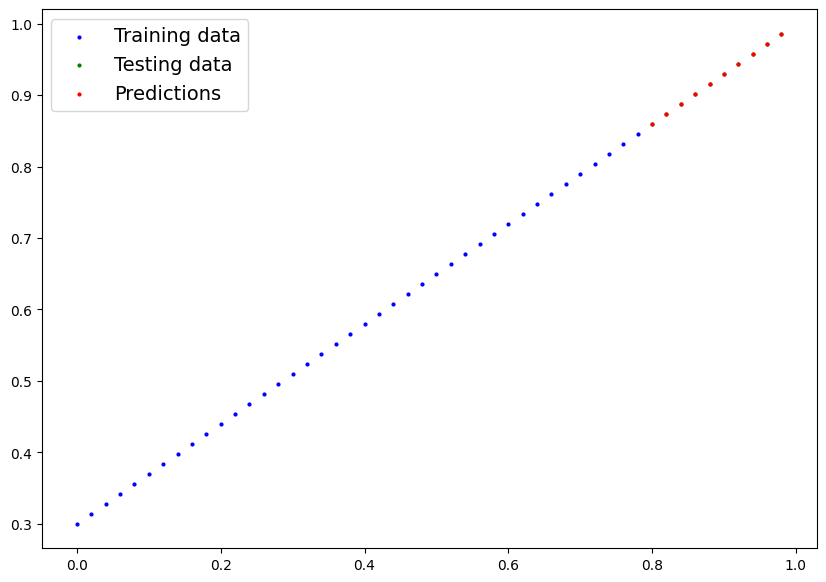

In [40]:
#visualize model predictions
plot_predictions(predictions = y_preds.cpu())

In [42]:
#saving and loading a trained model

from pathlib import Path

path = Path("models")
path.mkdir(parents = True, exist_ok = True)

model_name = "model_1"
model_save_path = path / model_name

#saving the parameters
torch.save(obj = model_1.state_dict(), f = model_save_path)


In [44]:
#load model

#create a new instance of LinearRegressionModelV2
loaded_model = LinearRegressionModelV2()


#load saved model parameters (state_dict)
loaded_model.load_state_dict(torch.load(model_save_path))

#move loaded model to device
loaded_model = loaded_model.to(device)


In [45]:
#Evaluate loaded model
loaded_model.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')